# Topic : Predicting the number of shares that a news will receive



<div class="alert alert-block alert-success">
<br></b> The Online news popularity dataset was sourced from UCI Machine learning repository.  </br>
    <br><a href="http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity">UCI Machine learning repository - in vehicle coupon recommendation dataset</a>
</div>


### Summary
The dataset contains numerous articles published by Mashable. Each row consist of an article that was published, their URL, number of tokens, links, images, videos, keywords, polairty, day on which it was published,medium of publish, positive and negative words in the article, closeness to 5 different LDA topic models and finally the number of shares that this article received. 

The goal of this project is to develop a machine learning model that can predict number of shares / reach an article would receive given various features. 

Machine Learning models that were used are : 
- K Nearest Neighbour 
- Linear Regression
- Ridge Regression
- Lasso Regression
- Polynomial Regression
- Support Vector Machines - Linear, RBF and Polynomial kernels
- Linear Support Vector Machines
- Decision Tree
- Stochastic Gradient 
- Bagging 
- Pasting
- Boosting : Ada Boost, Gradient Boosting  


## Context of the document : 
    
    1. Data Description 
    2. Null value imputation and feature selection
    3. Exploratory data analysis
    4. Data cleaning and imputation
    5. Modelling 
    6. Conclusion

## 1. Data description 

     1. url:                           URL of the article
     2. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     3. n_tokens_title:                Number of words in the title
     4. n_tokens_content:              Number of words in the content
     5. n_unique_tokens:               Rate of unique words in the content
     6. n_non_stop_words:              Rate of non-stop words in the content
     7. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     8. num_hrefs:                     Number of links
     9. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
    10. num_imgs:                      Number of images
    11. num_videos:                    Number of videos
    12. average_token_length:          Average length of the words in the
                                       content
    13. num_keywords:                  Number of keywords in the metadata
    14. kw_min_min:                    Worst keyword (min. shares)
    15. kw_max_min:                    Worst keyword (max. shares)
    16. kw_avg_min:                    Worst keyword (avg. shares)
    17. kw_min_max:                    Best keyword (min. shares)
    18. kw_max_max:                    Best keyword (max. shares)
    19. kw_avg_max:                    Best keyword (avg. shares)
    20. kw_min_avg:                    Avg. keyword (min. shares)
    21. kw_max_avg:                    Avg. keyword (max. shares)
    22. kw_avg_avg:                    Avg. keyword (avg. shares)
    23. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    24. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    25. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    26. is_weekend:                    Was the article published on weekend                
    27. LDA_00:                        Closeness to LDA topic 0
    28. LDA_01:                        Closeness to LDA topic 1
    29. LDA_02:                        Closeness to LDA topic 2
    30. LDA_03:                        Closeness to LDA topic 3
    31. LDA_04:                        Closeness to LDA topic 4
    32. global_subjectivity:           Text subjectivity
    33. global_sentiment_polarity:     Text sentiment polarity
    34. global_rate_positive_words:    Rate of positive words in the content
    35. global_rate_negative_words:    Rate of negative words in the content
    36. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    37. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    38. avg_positive_polarity:         Avg. polarity of positive words
    39. min_positive_polarity:         Min. polarity of positive words
    40. max_positive_polarity:         Max. polarity of positive words
    41. avg_negative_polarity:         Avg. polarity of negative  words
    42. min_negative_polarity:         Min. polarity of negative  words
    43. max_negative_polarity:         Max. polarity of negative  words
    44. title_subjectivity:            Title subjectivity
    45. title_sentiment_polarity:      Title polarity
    46. abs_title_subjectivity:        Absolute subjectivity level
    47. abs_title_sentiment_polarity:  Absolute polarity level
    48. shares:                        Number of shares (target)
    49. datachannel:                   Channel in which the news was published (categorical)
    50. day_of_week:                   Day on which the article was published(categorical)
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
regdata = pd.read_csv("online_news_popularity.csv")

    The raw dataset contains about 40k rows and 50 columns
    There are no missing values in the dataset 

In [3]:
regdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    39644 non-null  int64  
 1   url                           39644 non-null  object 
 2   timedelta                     39644 non-null  int64  
 3   n_tokens_title                39644 non-null  int64  
 4   n_tokens_content              39644 non-null  int64  
 5   n_unique_tokens               39644 non-null  float64
 6   n_non_stop_words              39644 non-null  float64
 7   n_non_stop_unique_tokens      39644 non-null  float64
 8   num_hrefs                     39644 non-null  int64  
 9   num_self_hrefs                39644 non-null  int64  
 10  num_imgs                      39644 non-null  int64  
 11  num_videos                    39644 non-null  int64  
 12  average_token_length          39644 non-null  float64
 13  n

## 2. Null value imputation and feature selection

In [4]:
# Drops first 3 columns, as they're not useable for prediction
regdata.drop(regdata.iloc[:, 0:3], inplace = True, axis = 1)
regdata.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664083,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
# Placing np.nan values into the dataset

cols = [2, 5, 7, 10, 26,28,46,47]
np.random.seed(0)
masking_array = np.random.randint(100, size = (regdata.shape[0], 8)) < 70
regdata[regdata.columns[cols]] = regdata[regdata.columns[cols]].where(masking_array,np.nan)

In [6]:
regdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39644 non-null  int64  
 1   n_tokens_content              39644 non-null  int64  
 2   n_unique_tokens               27746 non-null  float64
 3   n_non_stop_words              39644 non-null  float64
 4   n_non_stop_unique_tokens      39644 non-null  float64
 5   num_hrefs                     27700 non-null  float64
 6   num_self_hrefs                39644 non-null  int64  
 7   num_imgs                      27677 non-null  float64
 8   num_videos                    39644 non-null  int64  
 9   average_token_length          39644 non-null  float64
 10  num_keywords                  27753 non-null  float64
 11  kw_min_min                    39644 non-null  int64  
 12  kw_max_min                    39644 non-null  float64
 13  k

In total there are about 95k NA values across the dataset. That makes missing values about 5% of the entire dataset

In [7]:
regdata.isnull().values.sum()

94982

## 3. Exploratory Data Analysis 

In [8]:
regdata.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,27746.000000,39644.000000,39644.000000,27700.000000,39644.000000,27677.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.556005,0.996469,0.689175,10.890542,3.293638,4.582686,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,4.207443,5.231231,3.264816,11.314880,3.855141,8.385594,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.471005,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539326,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664083,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:

import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10


Text(0, 0.5, 'Count')

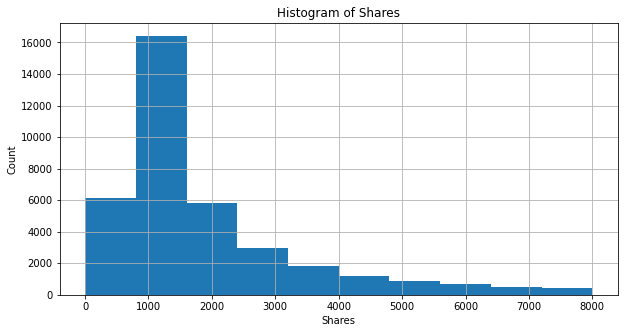

In [10]:
##Target variables - shares

plt.clf()
np.random.seed(1)

plt.style.use('default')

plt.subplot()
regdata['shares'].hist(bins = 10,range = (1,8000))
plt.title('Histogram of Shares')
plt.xlabel('Shares')
plt.ylabel('Count')

In [11]:
regdata['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

Text(0.5, 1.0, 'n_non_stop_unique_tokens')

<Figure size 640x480 with 0 Axes>

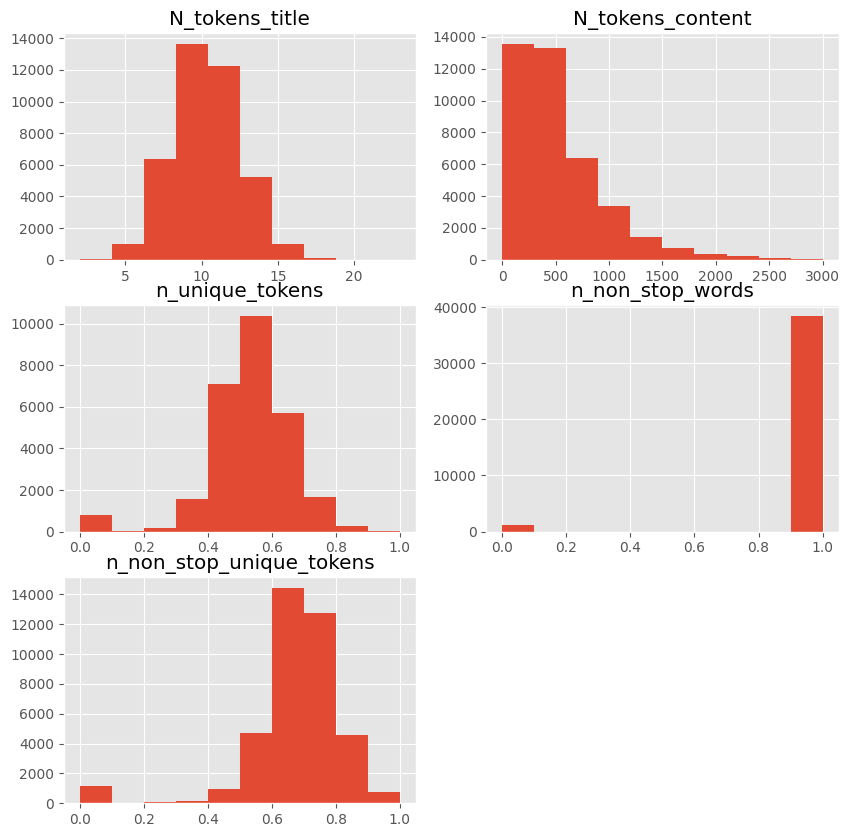

In [12]:
# Set up a grid of plots

plt.clf()
np.random.seed(1)

plt.style.use('ggplot')

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot N Tokens in title
plt.subplot2grid(fig_dims, (0, 0))
regdata['n_tokens_title'].hist()
plt.title('N_tokens_title')

# Plot N Tokens content
plt.subplot2grid(fig_dims, (0, 1))
regdata['n_tokens_content'].hist(bins = 10, range = (0,3000))
plt.title('N_tokens_content')

# Plot N unique tokens 
plt.subplot2grid(fig_dims, (1, 0))
regdata['n_unique_tokens'].hist(bins = 10, range = (0,1))
plt.title('n_unique_tokens')

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
regdata['n_non_stop_words'].hist(bins = 10, range = (0,1))
plt.title('n_non_stop_words')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
regdata['n_non_stop_unique_tokens'].hist(bins = 10, range = (0,1))
plt.title('n_non_stop_unique_tokens')

In [13]:
regdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39644 non-null  int64  
 1   n_tokens_content              39644 non-null  int64  
 2   n_unique_tokens               27746 non-null  float64
 3   n_non_stop_words              39644 non-null  float64
 4   n_non_stop_unique_tokens      39644 non-null  float64
 5   num_hrefs                     27700 non-null  float64
 6   num_self_hrefs                39644 non-null  int64  
 7   num_imgs                      27677 non-null  float64
 8   num_videos                    39644 non-null  int64  
 9   average_token_length          39644 non-null  float64
 10  num_keywords                  27753 non-null  float64
 11  kw_min_min                    39644 non-null  int64  
 12  kw_max_min                    39644 non-null  float64
 13  k

array([[<AxesSubplot:xlabel='kw_min_min', ylabel='kw_min_min'>,
        <AxesSubplot:xlabel='kw_max_min', ylabel='kw_min_min'>,
        <AxesSubplot:xlabel='kw_avg_min', ylabel='kw_min_min'>,
        <AxesSubplot:xlabel='kw_min_max', ylabel='kw_min_min'>,
        <AxesSubplot:xlabel='kw_max_max', ylabel='kw_min_min'>],
       [<AxesSubplot:xlabel='kw_min_min', ylabel='kw_max_min'>,
        <AxesSubplot:xlabel='kw_max_min', ylabel='kw_max_min'>,
        <AxesSubplot:xlabel='kw_avg_min', ylabel='kw_max_min'>,
        <AxesSubplot:xlabel='kw_min_max', ylabel='kw_max_min'>,
        <AxesSubplot:xlabel='kw_max_max', ylabel='kw_max_min'>],
       [<AxesSubplot:xlabel='kw_min_min', ylabel='kw_avg_min'>,
        <AxesSubplot:xlabel='kw_max_min', ylabel='kw_avg_min'>,
        <AxesSubplot:xlabel='kw_avg_min', ylabel='kw_avg_min'>,
        <AxesSubplot:xlabel='kw_min_max', ylabel='kw_avg_min'>,
        <AxesSubplot:xlabel='kw_max_max', ylabel='kw_avg_min'>],
       [<AxesSubplot:xlabel='kw_min_m

<Figure size 640x480 with 0 Axes>

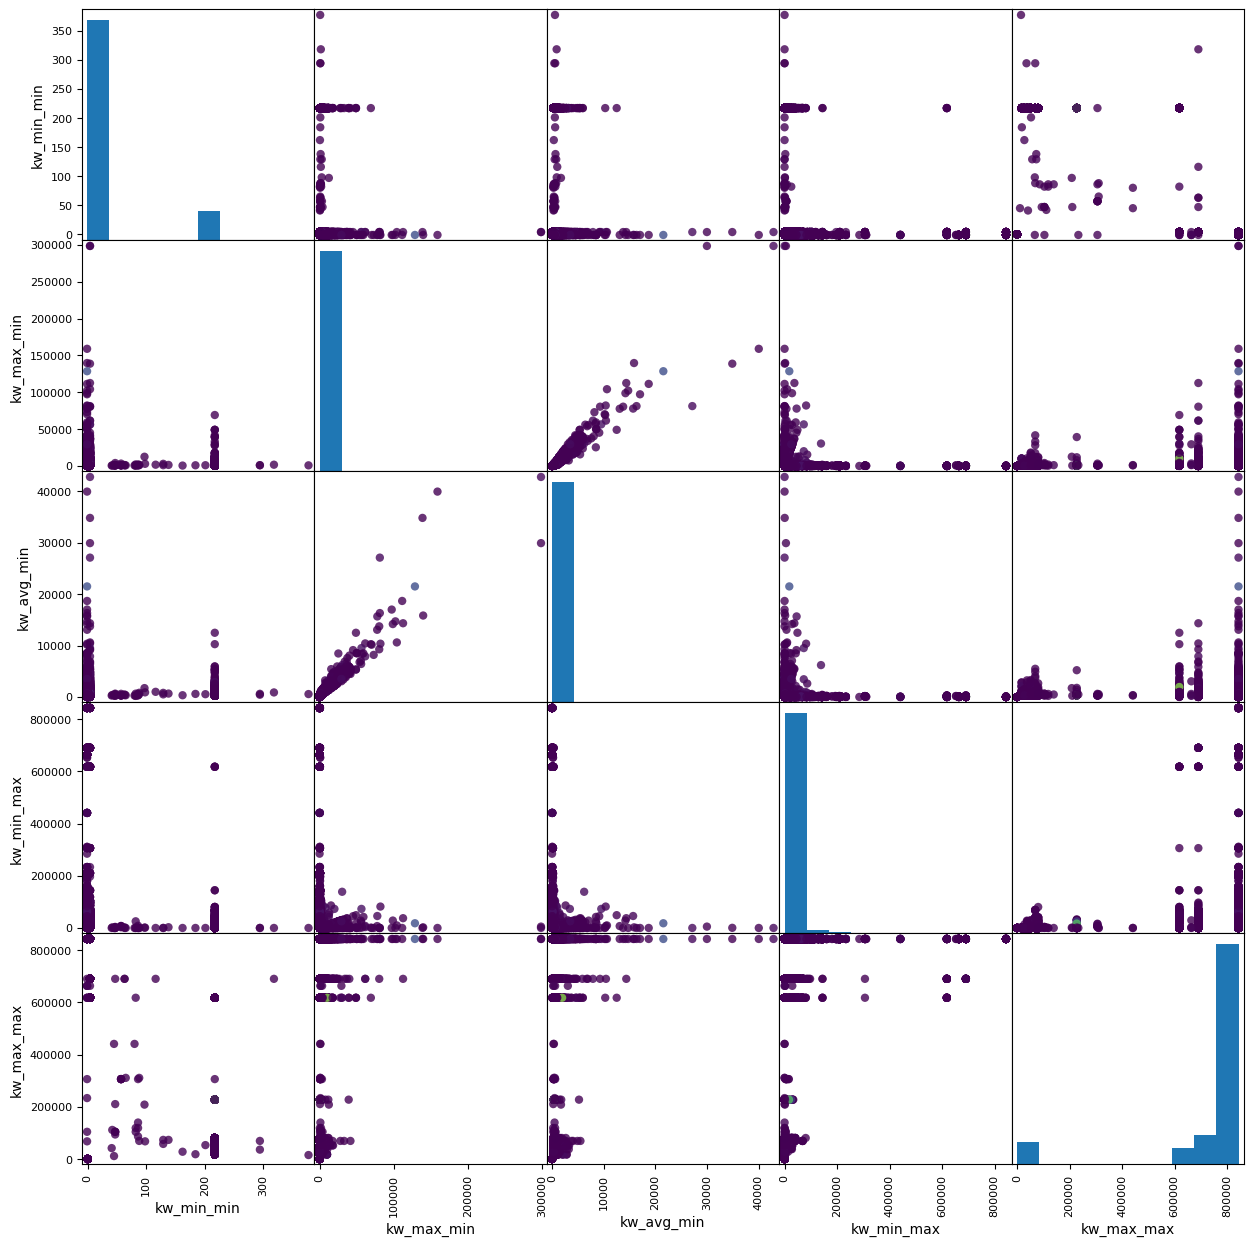

In [14]:
plt.clf()
np.random.seed(1)

plt.style.use('default')

plt.style.use('fast')

from pandas.plotting import scatter_matrix

X = regdata.drop('shares', axis = 1)
y = regdata['shares']

attributes = regdata.columns[11:16]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

array([[<AxesSubplot:xlabel='kw_avg_max', ylabel='kw_avg_max'>,
        <AxesSubplot:xlabel='kw_min_avg', ylabel='kw_avg_max'>,
        <AxesSubplot:xlabel='kw_max_avg', ylabel='kw_avg_max'>,
        <AxesSubplot:xlabel='kw_avg_avg', ylabel='kw_avg_max'>],
       [<AxesSubplot:xlabel='kw_avg_max', ylabel='kw_min_avg'>,
        <AxesSubplot:xlabel='kw_min_avg', ylabel='kw_min_avg'>,
        <AxesSubplot:xlabel='kw_max_avg', ylabel='kw_min_avg'>,
        <AxesSubplot:xlabel='kw_avg_avg', ylabel='kw_min_avg'>],
       [<AxesSubplot:xlabel='kw_avg_max', ylabel='kw_max_avg'>,
        <AxesSubplot:xlabel='kw_min_avg', ylabel='kw_max_avg'>,
        <AxesSubplot:xlabel='kw_max_avg', ylabel='kw_max_avg'>,
        <AxesSubplot:xlabel='kw_avg_avg', ylabel='kw_max_avg'>],
       [<AxesSubplot:xlabel='kw_avg_max', ylabel='kw_avg_avg'>,
        <AxesSubplot:xlabel='kw_min_avg', ylabel='kw_avg_avg'>,
        <AxesSubplot:xlabel='kw_max_avg', ylabel='kw_avg_avg'>,
        <AxesSubplot:xlabel='kw_avg_a

<Figure size 640x480 with 0 Axes>

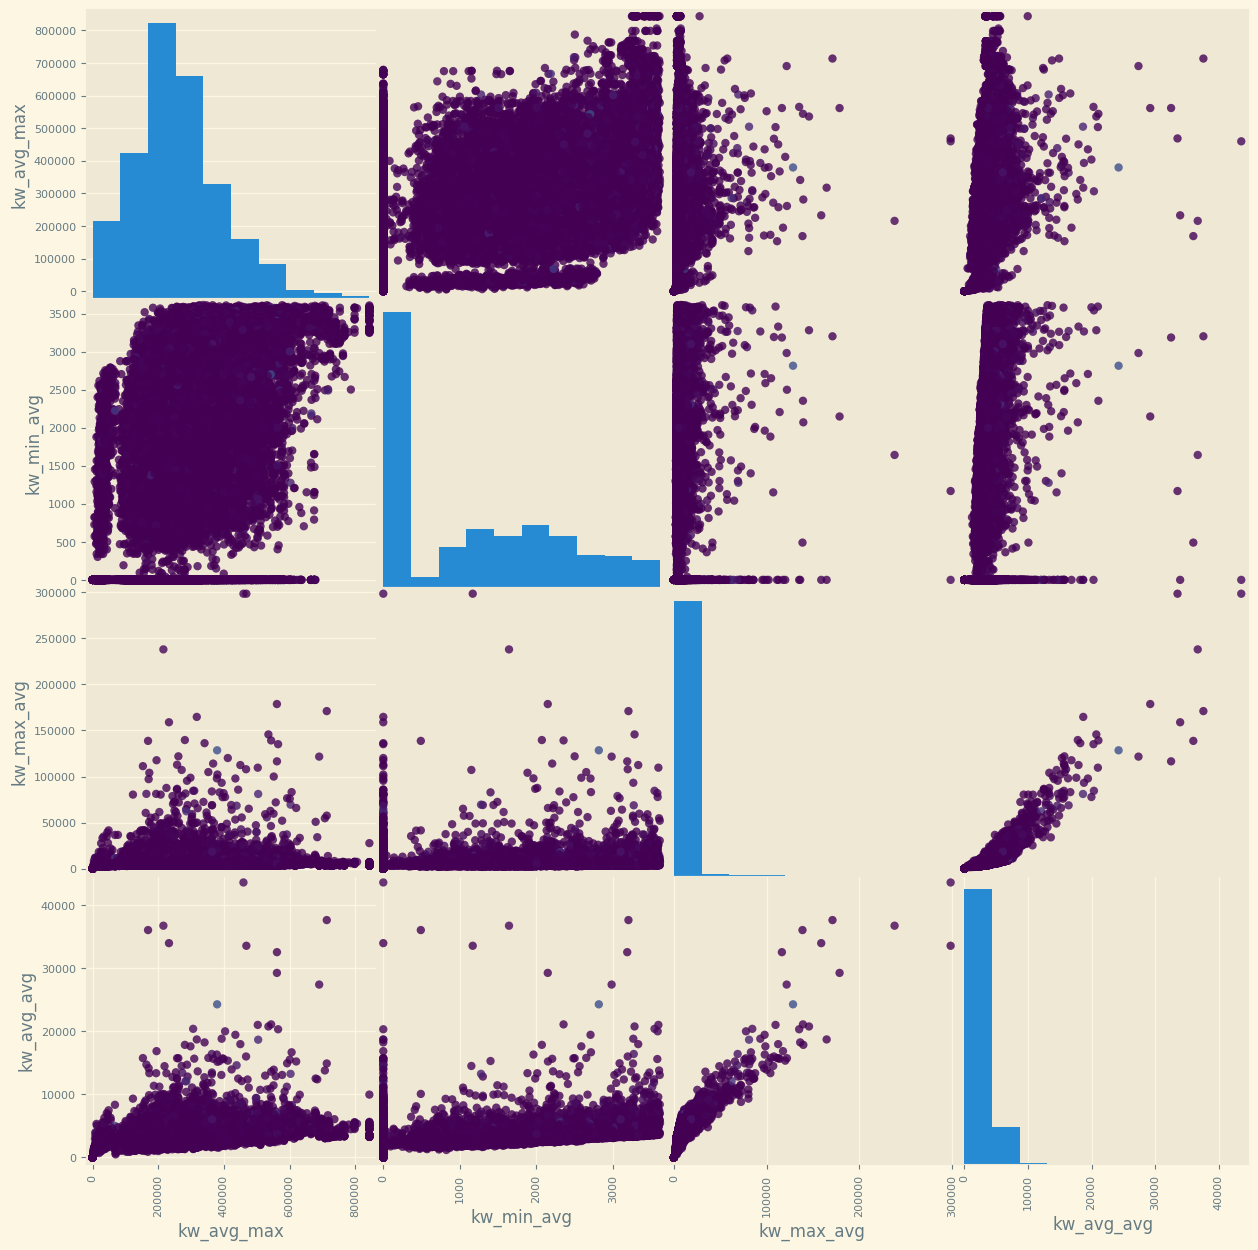

In [15]:

plt.clf()
np.random.seed(1)

plt.style.use('default')


plt.style.use('Solarize_Light2')

from pandas.plotting import scatter_matrix

X = regdata.drop('shares', axis = 1)
y = regdata['shares']

attributes = regdata.columns[16:20]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

array([[<AxesSubplot:xlabel='self_reference_min_shares', ylabel='self_reference_min_shares'>,
        <AxesSubplot:xlabel='self_reference_max_shares', ylabel='self_reference_min_shares'>,
        <AxesSubplot:xlabel='self_reference_avg_sharess', ylabel='self_reference_min_shares'>],
       [<AxesSubplot:xlabel='self_reference_min_shares', ylabel='self_reference_max_shares'>,
        <AxesSubplot:xlabel='self_reference_max_shares', ylabel='self_reference_max_shares'>,
        <AxesSubplot:xlabel='self_reference_avg_sharess', ylabel='self_reference_max_shares'>],
       [<AxesSubplot:xlabel='self_reference_min_shares', ylabel='self_reference_avg_sharess'>,
        <AxesSubplot:xlabel='self_reference_max_shares', ylabel='self_reference_avg_sharess'>,
        <AxesSubplot:xlabel='self_reference_avg_sharess', ylabel='self_reference_avg_sharess'>]],
      dtype=object)

<Figure size 640x480 with 0 Axes>

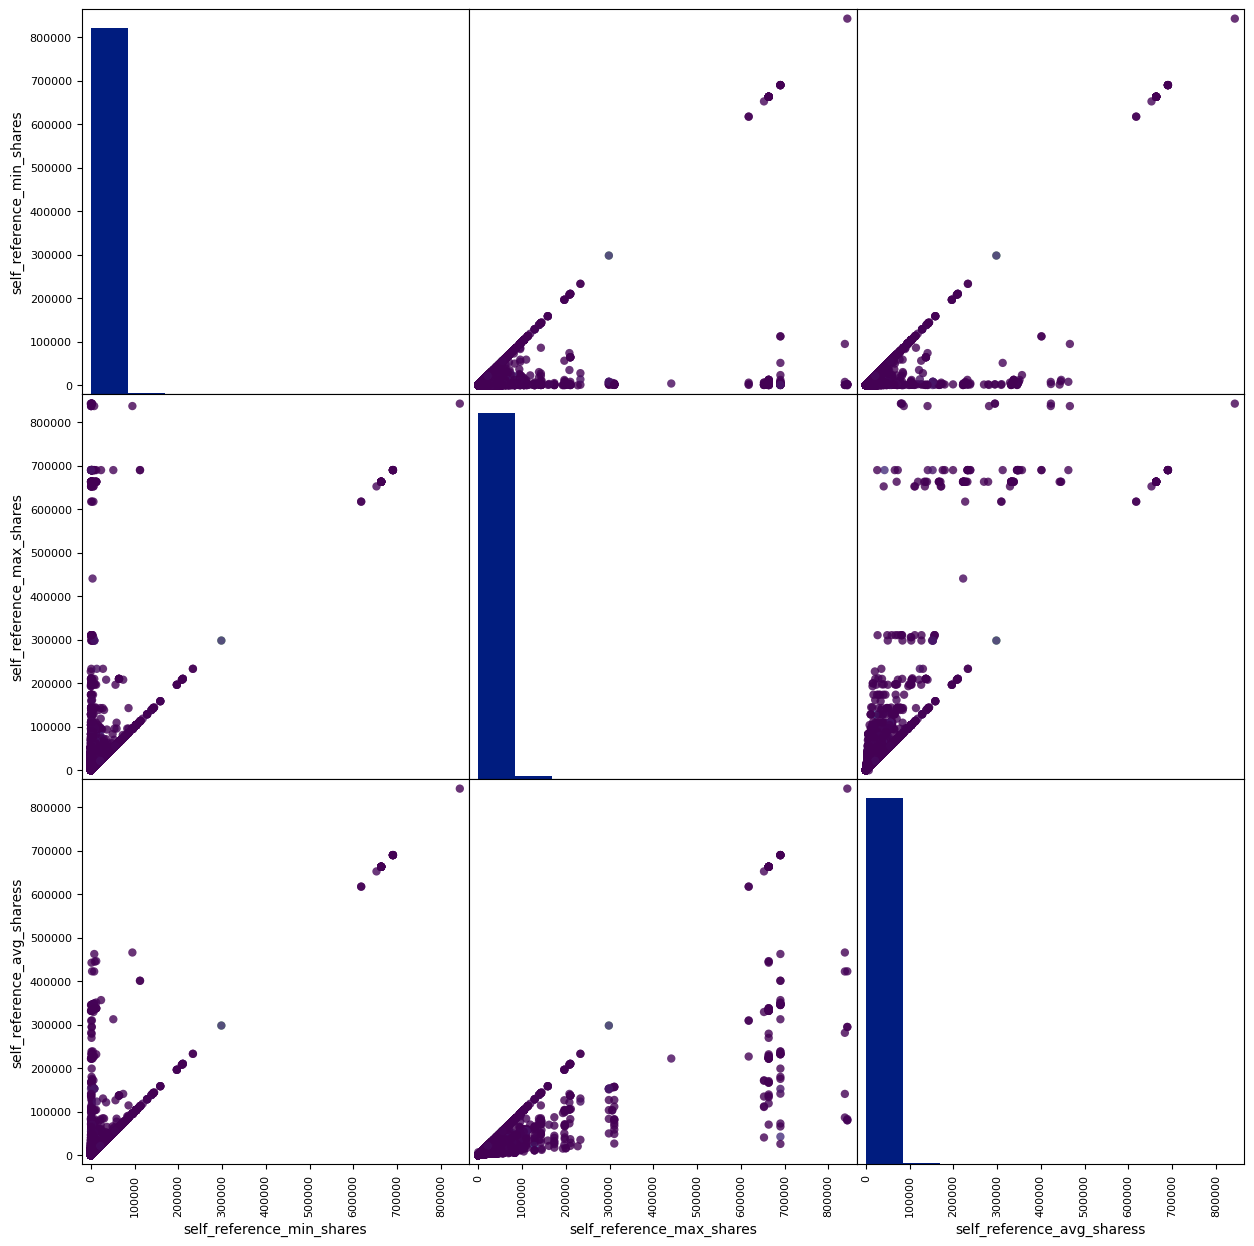

In [16]:

plt.clf()
np.random.seed(1)

plt.style.use('default')

plt.style.use('seaborn-dark-palette')

from pandas.plotting import scatter_matrix


X = regdata.drop('shares', axis = 1)
y = regdata['shares']

attributes = regdata.columns[20:23]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

array([[<AxesSubplot:xlabel='global_subjectivity', ylabel='global_subjectivity'>,
        <AxesSubplot:xlabel='global_sentiment_polarity', ylabel='global_subjectivity'>,
        <AxesSubplot:xlabel='global_rate_positive_words', ylabel='global_subjectivity'>,
        <AxesSubplot:xlabel='global_rate_negative_words', ylabel='global_subjectivity'>,
        <AxesSubplot:xlabel='rate_positive_words', ylabel='global_subjectivity'>],
       [<AxesSubplot:xlabel='global_subjectivity', ylabel='global_sentiment_polarity'>,
        <AxesSubplot:xlabel='global_sentiment_polarity', ylabel='global_sentiment_polarity'>,
        <AxesSubplot:xlabel='global_rate_positive_words', ylabel='global_sentiment_polarity'>,
        <AxesSubplot:xlabel='global_rate_negative_words', ylabel='global_sentiment_polarity'>,
        <AxesSubplot:xlabel='rate_positive_words', ylabel='global_sentiment_polarity'>],
       [<AxesSubplot:xlabel='global_subjectivity', ylabel='global_rate_positive_words'>,
        <AxesSubplo

<Figure size 640x480 with 0 Axes>

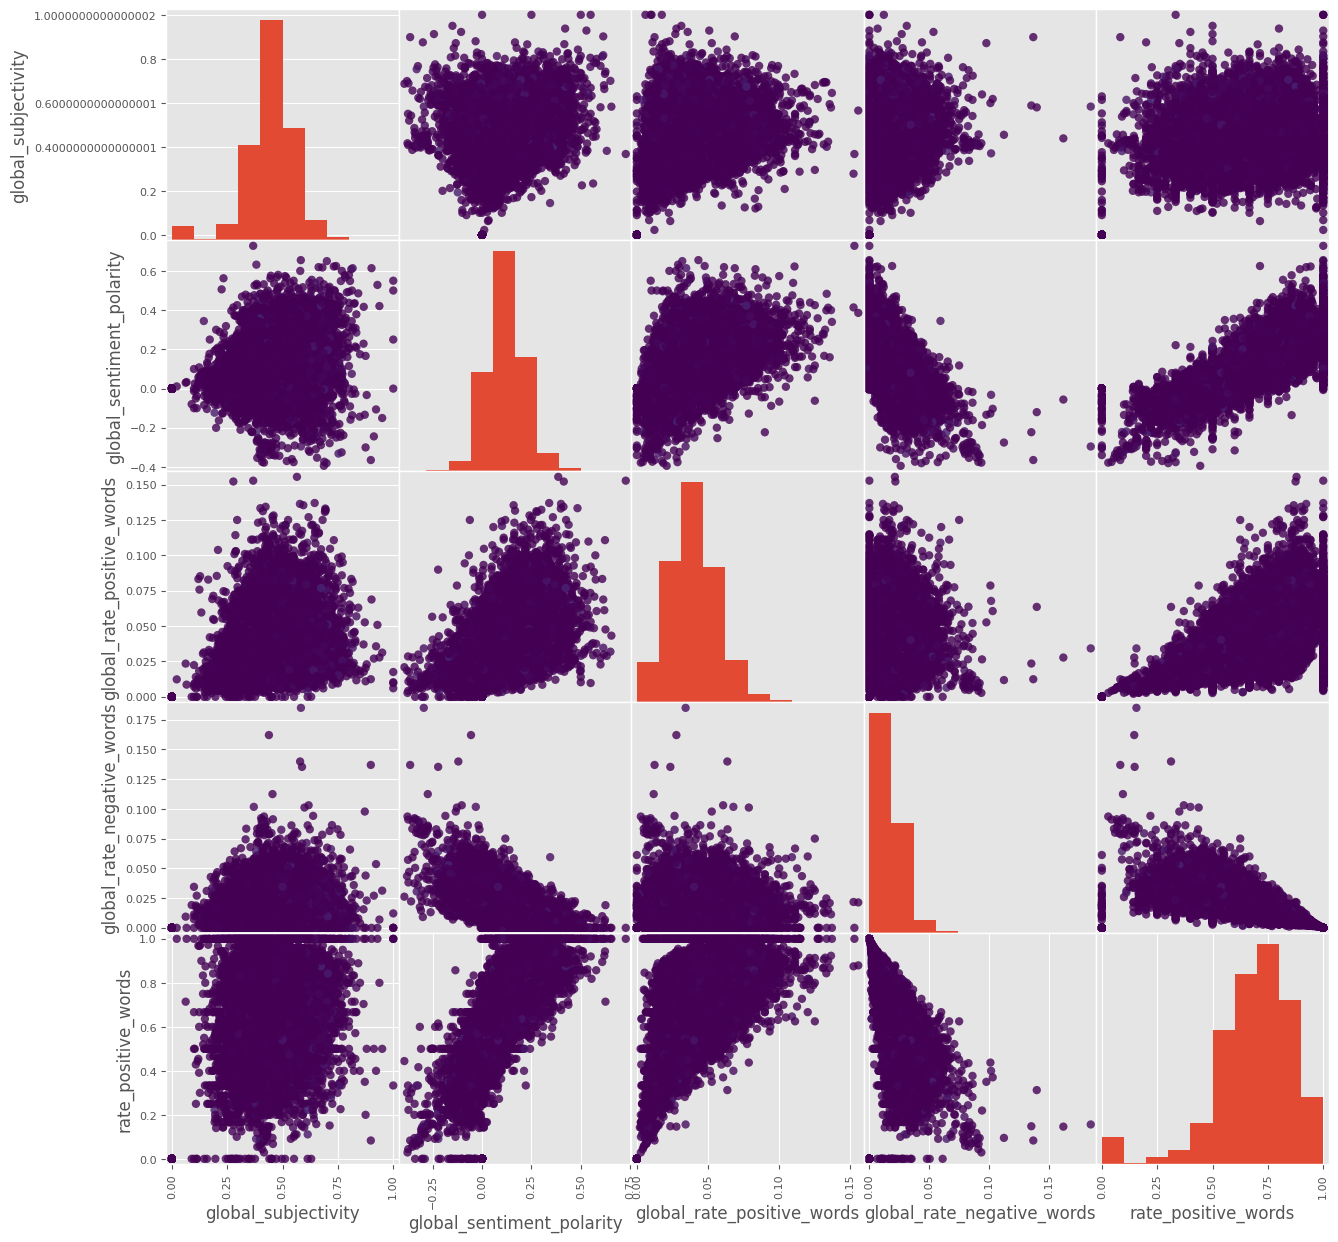

In [17]:

plt.clf()
np.random.seed(1)

plt.style.use('default')
plt.style.use('ggplot')


from pandas.plotting import scatter_matrix

X = regdata.drop('shares', axis = 1)
y = regdata['shares']

attributes = regdata.columns[29:34]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

array([[<AxesSubplot:xlabel='rate_negative_words', ylabel='rate_negative_words'>,
        <AxesSubplot:xlabel='avg_positive_polarity', ylabel='rate_negative_words'>,
        <AxesSubplot:xlabel='min_positive_polarity', ylabel='rate_negative_words'>,
        <AxesSubplot:xlabel='max_positive_polarity', ylabel='rate_negative_words'>,
        <AxesSubplot:xlabel='avg_negative_polarity', ylabel='rate_negative_words'>],
       [<AxesSubplot:xlabel='rate_negative_words', ylabel='avg_positive_polarity'>,
        <AxesSubplot:xlabel='avg_positive_polarity', ylabel='avg_positive_polarity'>,
        <AxesSubplot:xlabel='min_positive_polarity', ylabel='avg_positive_polarity'>,
        <AxesSubplot:xlabel='max_positive_polarity', ylabel='avg_positive_polarity'>,
        <AxesSubplot:xlabel='avg_negative_polarity', ylabel='avg_positive_polarity'>],
       [<AxesSubplot:xlabel='rate_negative_words', ylabel='min_positive_polarity'>,
        <AxesSubplot:xlabel='avg_positive_polarity', ylabel='min_pos

<Figure size 640x480 with 0 Axes>

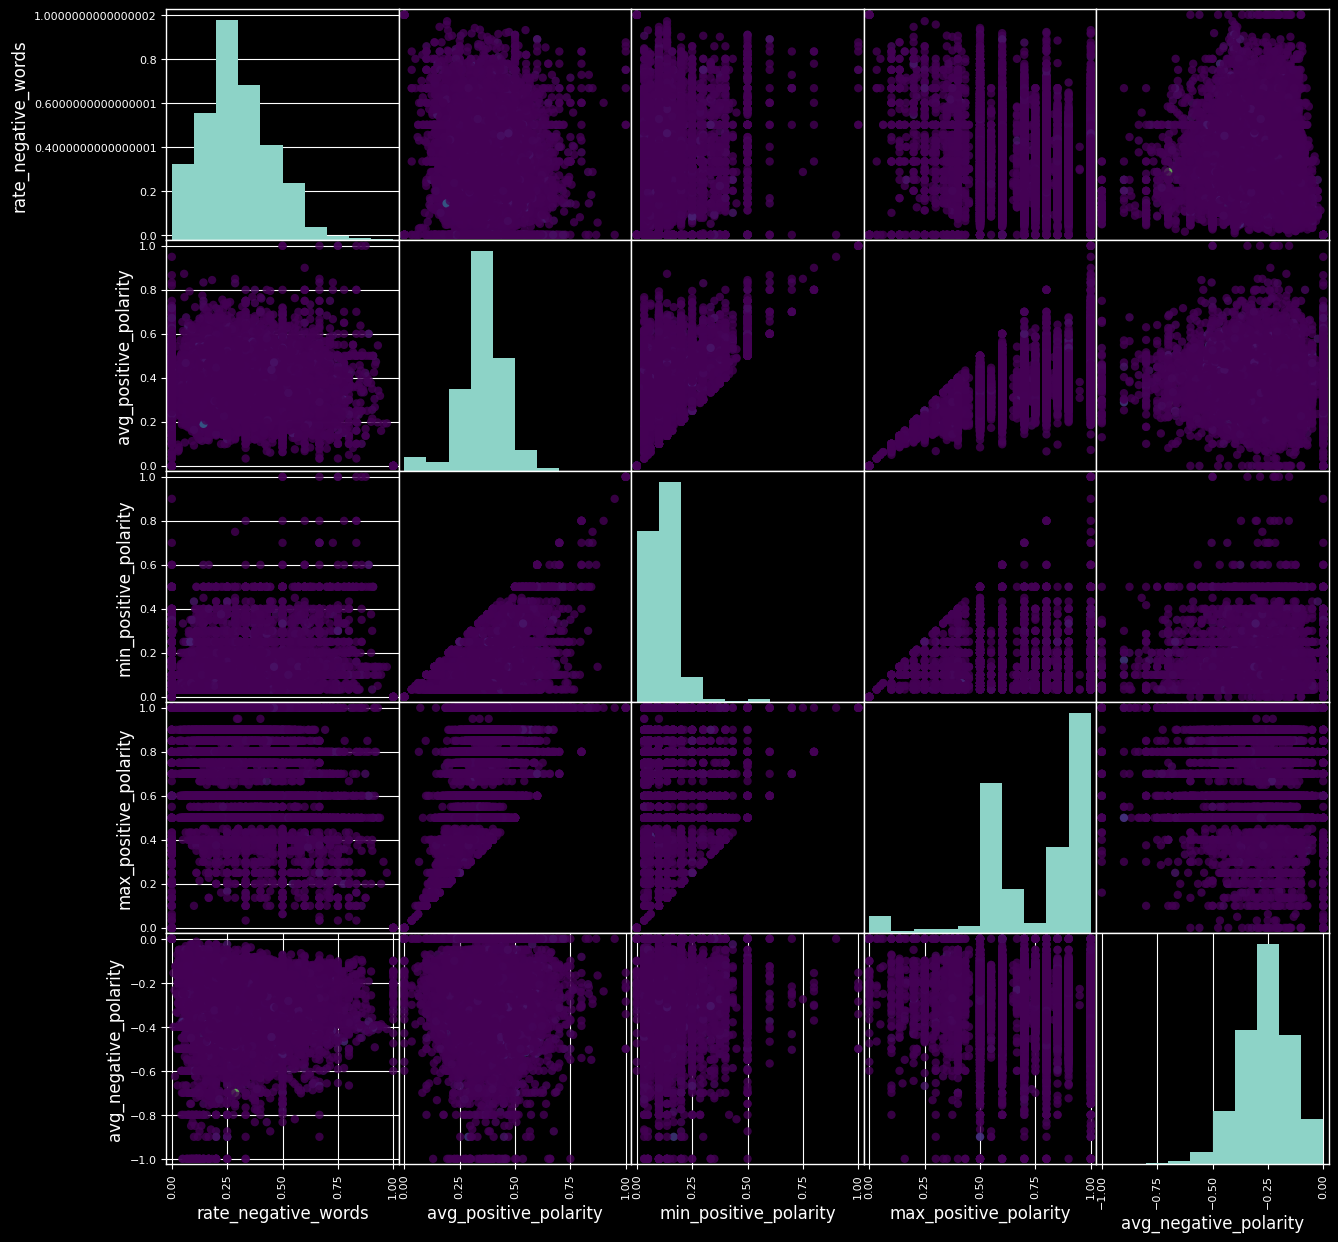

In [18]:
plt.clf()
np.random.seed(1)


plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')


from pandas.plotting import scatter_matrix

X = regdata.drop('shares',axis = 1)
y = regdata['shares']

attributes = regdata.columns[34:39]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

array([[<AxesSubplot:xlabel='min_negative_polarity', ylabel='min_negative_polarity'>,
        <AxesSubplot:xlabel='max_negative_polarity', ylabel='min_negative_polarity'>,
        <AxesSubplot:xlabel='title_subjectivity', ylabel='min_negative_polarity'>],
       [<AxesSubplot:xlabel='min_negative_polarity', ylabel='max_negative_polarity'>,
        <AxesSubplot:xlabel='max_negative_polarity', ylabel='max_negative_polarity'>,
        <AxesSubplot:xlabel='title_subjectivity', ylabel='max_negative_polarity'>],
       [<AxesSubplot:xlabel='min_negative_polarity', ylabel='title_subjectivity'>,
        <AxesSubplot:xlabel='max_negative_polarity', ylabel='title_subjectivity'>,
        <AxesSubplot:xlabel='title_subjectivity', ylabel='title_subjectivity'>]],
      dtype=object)

<Figure size 640x480 with 0 Axes>

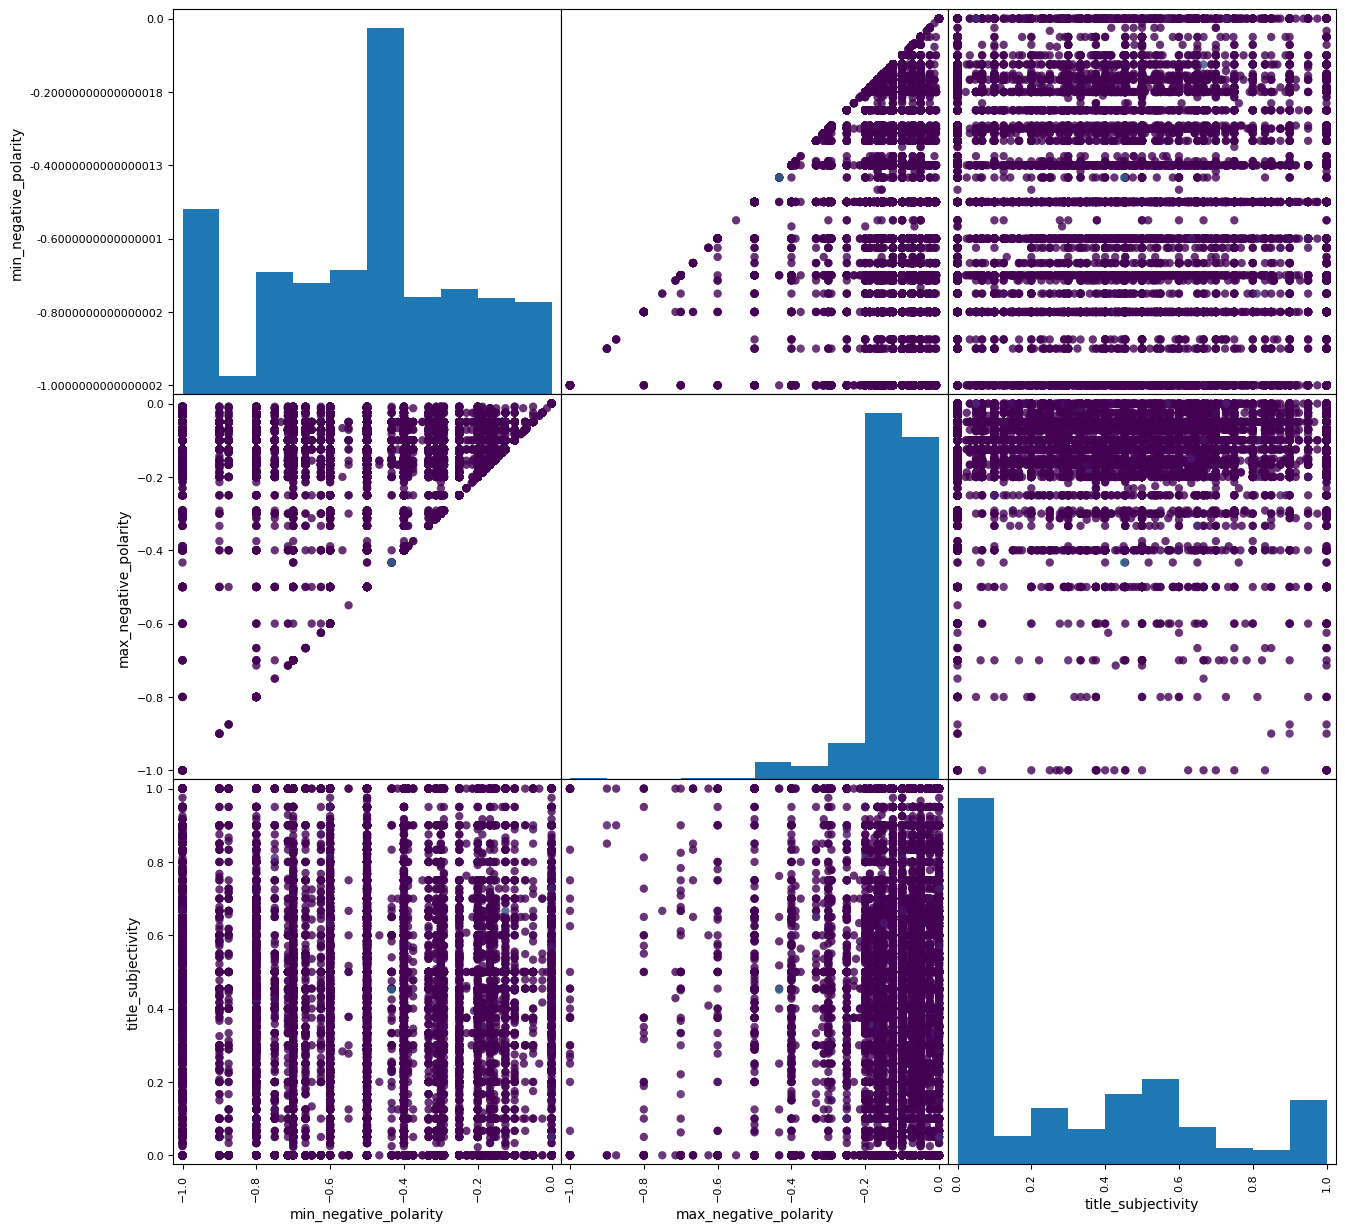

In [19]:
plt.clf()
np.random.seed(1)

plt.style.use('default')
from pandas.plotting import scatter_matrix


X = regdata.drop('shares',axis = 1)
y = regdata['shares']

attributes = regdata.columns[39:42]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

array([[<AxesSubplot:xlabel='title_sentiment_polarity', ylabel='title_sentiment_polarity'>,
        <AxesSubplot:xlabel='abs_title_subjectivity', ylabel='title_sentiment_polarity'>,
        <AxesSubplot:xlabel='abs_title_sentiment_polarity', ylabel='title_sentiment_polarity'>],
       [<AxesSubplot:xlabel='title_sentiment_polarity', ylabel='abs_title_subjectivity'>,
        <AxesSubplot:xlabel='abs_title_subjectivity', ylabel='abs_title_subjectivity'>,
        <AxesSubplot:xlabel='abs_title_sentiment_polarity', ylabel='abs_title_subjectivity'>],
       [<AxesSubplot:xlabel='title_sentiment_polarity', ylabel='abs_title_sentiment_polarity'>,
        <AxesSubplot:xlabel='abs_title_subjectivity', ylabel='abs_title_sentiment_polarity'>,
        <AxesSubplot:xlabel='abs_title_sentiment_polarity', ylabel='abs_title_sentiment_polarity'>]],
      dtype=object)

<Figure size 640x480 with 0 Axes>

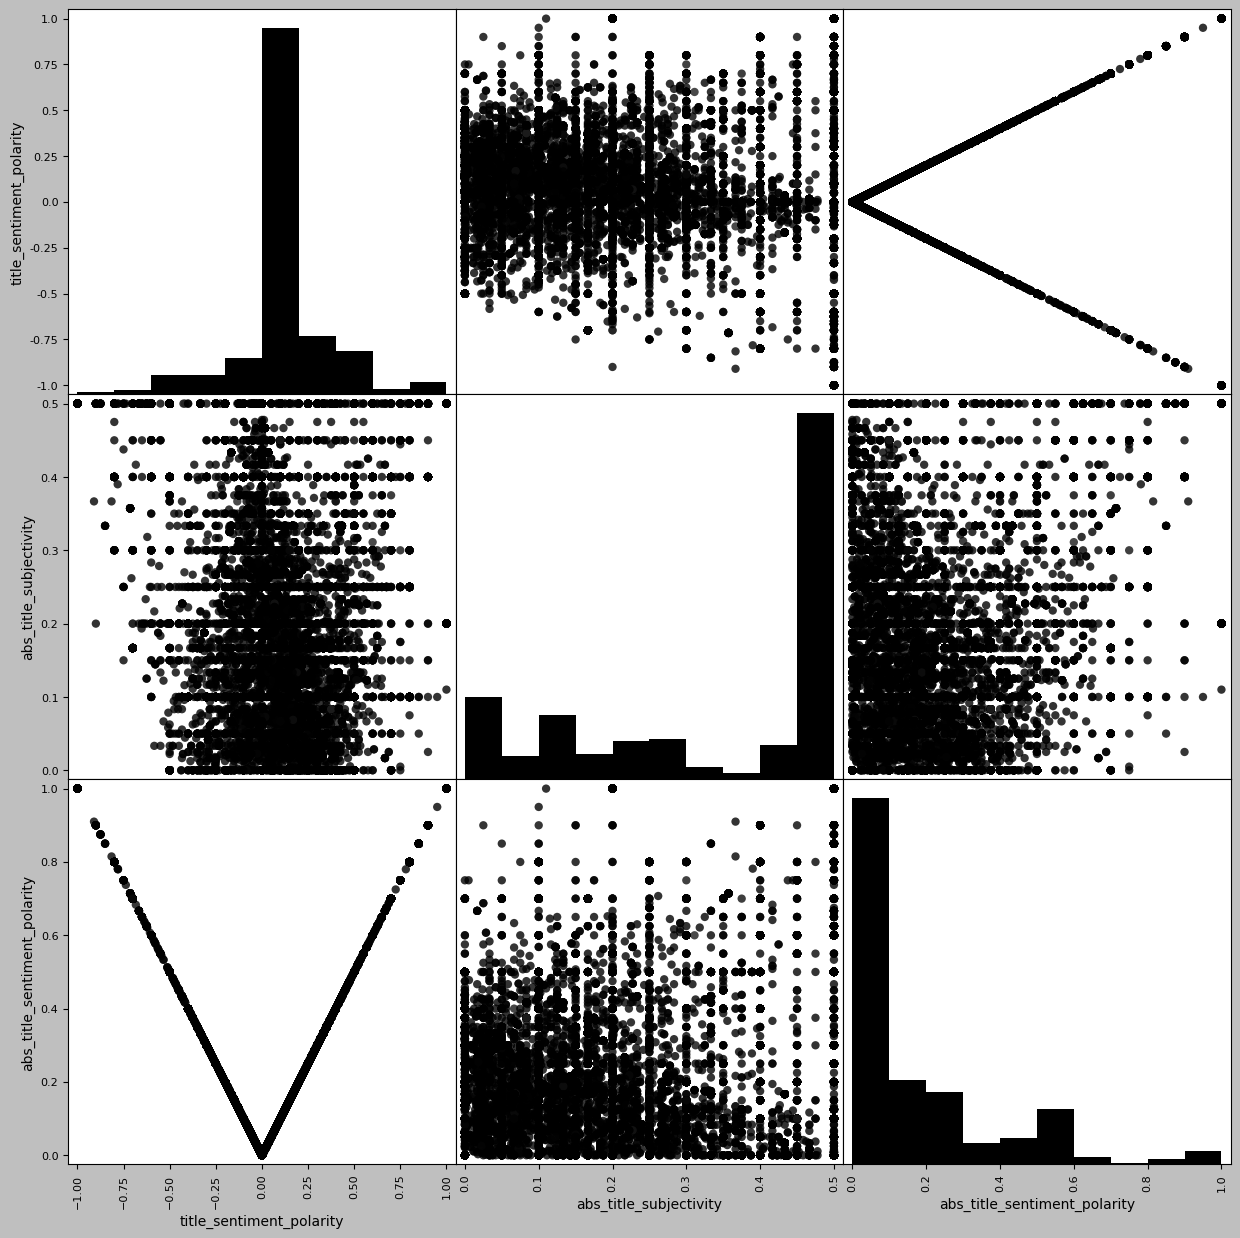

In [20]:
plt.clf()
np.random.seed(1)

plt.style.use('grayscale')
from pandas.plotting import scatter_matrix

X = regdata.drop('shares',axis = 1)
y = regdata['shares']

attributes = regdata.columns[42:45]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

## 4. Data cleaning and imputation

  There are 8 columns with missing data that needs to be addressed.

       Imputing datachannel columns with Mode

In [21]:
regdata['datachannel'].unique()

array([nan, 'bus', 'entertainment', 'tech', 'lifestyle', 'world',
       'socmed'], dtype=object)

In [22]:
regdata['datachannel'].value_counts()

world            10169
tech              5147
entertainment     4954
bus               4387
socmed            1640
lifestyle         1465
Name: datachannel, dtype: int64

In [23]:
regdata['datachannel'] = regdata['datachannel'].replace(np.NaN, 'world')

In [24]:
regdata[regdata['day_of_week'].isnull()][['day_of_week','datachannel','is_weekend']].groupby('is_weekend').count()['datachannel']

is_weekend
0    10239
1     1509
Name: datachannel, dtype: int64

In [25]:
regdata['day_of_week'].value_counts()

wednesday    5251
tuesday      5213
thursday     5110
monday       4638
friday       4003
sunday       1945
saturday     1736
Name: day_of_week, dtype: int64

     Imputing day_of_week to be the mode of the column according to is_weekend
          If is_weekend is 1, then day_of_week will be Imputed with Sunday, else Wednesday

In [26]:
regdata.loc[regdata.day_of_week.isna() & regdata.is_weekend != 0, 'day_of_week'] = 'sunday'

In [27]:
regdata.loc[regdata.day_of_week.isna(),'day_of_week'] = 'wednesday'

In [28]:
regdata['day_of_week'].value_counts()

wednesday    15490
tuesday       5213
thursday      5110
monday        4638
friday        4003
sunday        3454
saturday      1736
Name: day_of_week, dtype: int64

     One hot encoding the variables day_of_week and datachannel 

In [29]:
cols1 = pd.get_dummies(regdata['day_of_week'], prefix = 'Day')
regdata[cols1.columns] = cols1
regdata.drop('day_of_week', axis = 1, inplace = True)

In [30]:
cols1 = pd.get_dummies(regdata['datachannel'], prefix = 'Datachannel')
regdata[cols1.columns] = cols1
regdata.drop('datachannel', axis = 1, inplace = True)

In [31]:
regdata.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity',

        Imputing number of unique tokens with mean

In [32]:
regdata['n_unique_tokens'].describe()

count    27746.000000
mean         0.556005
std          4.207443
min          0.000000
25%          0.471005
50%          0.539326
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64

In [33]:
regdata['n_unique_tokens'].fillna(regdata['n_unique_tokens'].mean(), inplace = True)

        Imputing number of total links (hrefs) with number of self page links
            * Number of hrefs should be greater or equal to number of self hrefs. 

In [34]:
regdata[['num_hrefs','num_self_hrefs']].groupby('num_self_hrefs').median()

,num_hrefs
num_self_hrefs,
0,8.0
1,5.0
2,6.0
3,7.0
4,7.0
5,8.0
6,10.0
7,11.0
8,12.0


In [35]:
regdata.loc[regdata.num_hrefs.isna(), 'num_hrefs'] = regdata['num_self_hrefs']

        Imputing number of Images and number of Keywords with Median

In [36]:
regdata['num_imgs'].fillna(regdata['num_imgs'].median(), inplace = True)

In [37]:
regdata['num_keywords'].fillna(regdata['num_keywords'].median(), inplace = True)

        Imputing LDA closeness with Mean

In [38]:
regdata['LDA_02'].fillna(regdata['LDA_02'].mean(), inplace = True)

In [39]:
regdata['LDA_04'].fillna(regdata['LDA_04'].mean(), inplace = True)

#### Complete dataset is shown below 

In [40]:
regdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39644 non-null  int64  
 1   n_tokens_content              39644 non-null  int64  
 2   n_unique_tokens               39644 non-null  float64
 3   n_non_stop_words              39644 non-null  float64
 4   n_non_stop_unique_tokens      39644 non-null  float64
 5   num_hrefs                     39644 non-null  float64
 6   num_self_hrefs                39644 non-null  int64  
 7   num_imgs                      39644 non-null  float64
 8   num_videos                    39644 non-null  int64  
 9   average_token_length          39644 non-null  float64
 10  num_keywords                  39644 non-null  float64
 11  kw_min_min                    39644 non-null  int64  
 12  kw_max_min                    39644 non-null  float64
 13  k

## 5. Modelling

    From our Exploratory data analysis, we saw that the distribution of the data is not normally distributed and also had large outliers.

    Hence we opt for Min Max Scaler for scaling the dataset.  

    Notations used in modelling :
    
    1. X_train_org    : X_train complete data
    2. X_test_org     : X_test complete data
    
    3. y_train_org    : y_train complete data 
    4. y_test_org     : y_test complete data
    
    5. X_train_scaled : X_train after applying Min Max scaler
    6. X_test_scaled  : X_test after applying Min Max scaler
    
    5. X_train_sample : 15% of samples from X_train_org as a sub sample 
    6. y_train_sample : 15% of samples from y_train_org as a sub sample
    

In [41]:
X1 = regdata.drop('shares',axis =1)
Y1 = regdata['shares']

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X1,Y1, random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test_org)

    Since the dataset is large, a KNN with grid search and SVR models will be run on a subset of the dataset and the remaining will be on the entire dataset. 

    After arriving at the best model, the parameters will be used to train the entire dataset

### K Nearest Neighbors Regressor on a sample of the dataset 

    Approach 1 : KNN with 5 fold Cross validation using a sample of the dataset

In [43]:
from sklearn.model_selection import train_test_split
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train_scaled,y_train_org, train_size = 0.15, random_state = 0)

In [48]:
param_grid = {'n_neighbors': np.arange(1,30,1)}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)

In [50]:
grid_search.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             return_train_score=True)

In [51]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 29}
Best cross-validation score: -0.04


    Approach 2 : KNN with 10 fold Cross validation using a sample of the dataset

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)

In [53]:
grid_search.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             return_train_score=True)

In [54]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 28}
Best cross-validation score: -0.04


- The best score from all three models is the 10 fold cross validated model with cross validation score as -0.04

- Now using n_neighbors as 28, training the entire dataset :

In [96]:
knn = KNeighborsRegressor(n_neighbors = 28)
knn.fit(X_train_scaled, y_train_org)
print('Train score : ', knn.score(X_train_scaled, y_train_org))
print('Test score : ', knn.score(X_test_scaled, y_test_org))

Train score :  0.05804987717547361
Test score :  -0.03723537848183334


### Linear Regression on the entire dataset

In [56]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X_train_scaled,y_train_org)
print(lreg.score(X_train_scaled,y_train_org))
print(lreg.score(X_test_scaled,y_test_org))

0.02148014586236302
-3.921789951519056


    Linear Regression with cross validation

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X_train_scaled,y_train_org,cv = 5)
print("Cross-validation scores: {}".format(scores))
print("Average Cross-validation scores: {}".format(np.mean(scores)))

Cross-validation scores: [0.01469782 0.01387284 0.01177709 0.01664361 0.02096524]
Average Cross-validation scores: 0.01559132047201619


### Ridge Regression on the entire dataset

    Approach 1: Using Grid search with cross validation approach

In [58]:
from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []
best_score = 0
for alpha in [0.001,0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha)
    scores = cross_val_score(ridge, X_train_scaled,y_train_org, cv=5)
    score = np.mean(scores)
    ridge.fit(X_train_scaled,y_train_org)
    train_score_list.append(ridge.score(X_train_scaled,y_train_org))
    test_score_list.append(ridge.score(X_test_scaled,y_test_org))
    if score > best_score:
            best_score = score
            best_parameters = {'Alpha': alpha}
            
print('Best alpha :', best_parameters)

Best alpha : {'Alpha': 1}


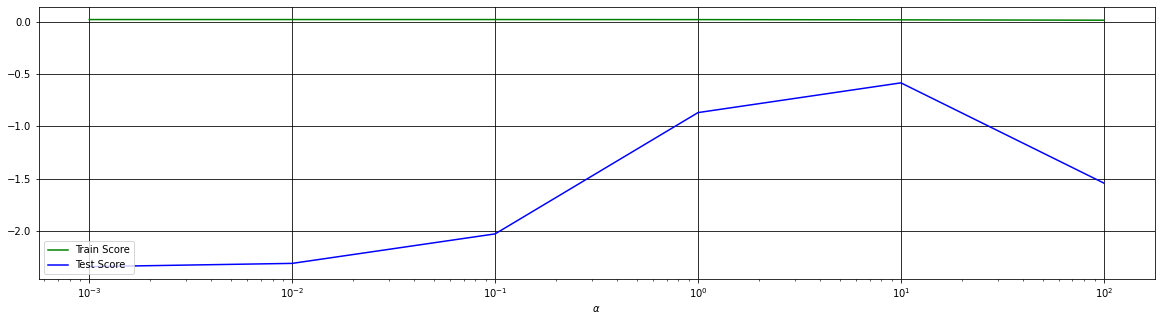

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.001,0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

    Approach 2: Using Grid Search CV  

In [60]:
param_grid = {'alpha' : [0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100, 1000]}


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

In [62]:
grid_search.fit(X_train_scaled, y_train_org)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [63]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.02


In [97]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_scaled, y_train_org)
print('Train score : ', ridge.score(X_train_scaled, y_train_org))
print('Test score : ', ridge.score(X_test_scaled, y_test_org))

Train score :  0.02146414468353397
Test score :  -0.8673496490780148


### Lasso Regression on the entire dataset

    Approach 1: Using Grid search with cross validation approach

In [65]:
from sklearn.linear_model import Lasso
x_range = [1000,100,10,1,0.1]
train_score_list = []
test_score_list = []
best_score = 0
for alpha in x_range: 
    lasso = Lasso(alpha)
    scores = cross_val_score(lasso, X_train_scaled,y_train_org, cv=5)
    score = np.mean(scores)
    lasso.fit(X_train_scaled,y_train_org)
    train_score_list.append(lasso.score(X_train_scaled,y_train_org))
    test_score_list.append(lasso.score(X_test_scaled,y_test_org))
    if score > best_score:
            best_score = score
            best_parameters = {'Alpha': alpha}
print('Best alpha :', best_parameters)

Best alpha : {'Alpha': 10}


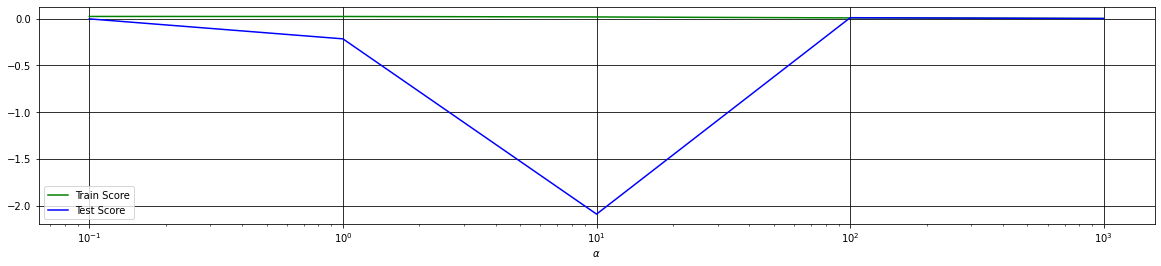

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (20,4))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

    Approach 2: Using Grid Search CV  

In [67]:
param_grid = {'alpha' : [1000,100,10,1,0.1]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [1000, 100, 10, 1, 0.1]}


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)

In [69]:
grid_search.fit(X_train_scaled, y_train_org)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1000, 100, 10, 1, 0.1]},
             return_train_score=True)

In [70]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.02


In [71]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train_scaled, y_train_org)
print('Train score : ', lasso.score(X_train_scaled, y_train_org))
print('Test score : ', lasso.score(X_test_scaled, y_test_org))

Train score :  0.016625829393115965
Test score :  -2.091736763044051


### Polynomial Regressor on entire dataset

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from pandas import DataFrame

poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(X_train_scaled)
x_test_poly = poly.transform(X_test_scaled)
DataFrame(x_train_poly).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Columns: 1770 entries, 0 to 1769
dtypes: float64(1770)
memory usage: 401.5 MB


In [101]:
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train_org)
print(poly_reg.score(x_train_poly, y_train_org))
print(poly_reg.score(x_test_poly, y_test_org))

0.13341478819745745
-3.699646596935888e+28


### Support Vectore Machine Regressors

### a. Linear SVR on the entire dataset

In [98]:
from sklearn.svm import LinearSVR
svr_lin = LinearSVR()
svr_lin.fit(X_train_scaled,y_train_org)
print('Train score',svr_lin.score(X_train_scaled,y_train_org))
print('Test score', svr_lin.score(X_test_scaled,y_test_org))

Train score -0.022581594552227413
Test score -0.04175630325748103


### b. SVR with linear kernel on the entire dataset

In [75]:
from sklearn.svm import SVR

SVR_lin = SVR(kernel = 'linear')
SVR_lin.fit(X_train_scaled,y_train_org)
print('Train score : ', SVR_lin.score(X_train_scaled,y_train_org))
print('Test score : ', SVR_lin.score(X_test_scaled,y_test_org))

Train score :  -0.022545524194157007
Test score :  -0.11046987252116791


### c. SVR with rbf kernel on a sample data

In [76]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv=5, return_train_score=True)

In [78]:
grid_search.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [79]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: -0.04


Using the best parameters on the overall dataset

In [102]:
SVR_rbf = SVR(kernel = 'rbf', gamma = 0.1,C = 100)
SVR_rbf.fit(X_train_scaled,y_train_org)
print('Train score : ', SVR_rbf.score(X_train_scaled,y_train_org))
print('Test score : ', SVR_rbf.score(X_test_scaled,y_test_org))

Train score :  -0.019026720771743166
Test score :  -0.03612353312347705


### d. SVR with poly kernel on a sample data

In [81]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel = 'poly', degree =2), param_grid, cv=5, return_train_score=True)

In [83]:
grid_search.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=SVR(degree=2, kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [84]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: -0.03


Using the best parameters on the overall dataset

In [103]:
SVR_poly = SVR(kernel = 'poly', degree = 2, C = 100)
SVR_poly.fit(X_train_scaled,y_train_org)
print('Train score : ', SVR_poly.score(X_train_scaled,y_train_org))
print('Test score : ', SVR_poly.score(X_test_scaled,y_test_org))

Train score :  -0.017908562999887856
Test score :  -7636.71360247961


### Decision Tree Regressor on the entire dataset

In [50]:
param_grid = {'max_leaf_nodes': [2,5,10,15,20,25],
             'max_depth': [2,3,4,5,6]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_leaf_nodes': [2, 5, 10, 15, 20, 25], 'max_depth': [2, 3, 4, 5, 6]}


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
grid_search = GridSearchCV(DecisionTreeRegressor(random_state = 0), param_grid, cv=5, return_train_score=True)

In [52]:
grid_search.fit(X_train_scaled,y_train_org)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 5, 10, 15, 20, 25]},
             return_train_score=True)

In [53]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2, 'max_leaf_nodes': 2}
Best cross-validation score: 0.01


In [54]:
dtree = DecisionTreeRegressor(max_leaf_nodes = 2,max_depth = 2,random_state =0)
dtree.fit(X_train_scaled,y_train_org)
print(dtree.score(X_train_scaled,y_train_org))
print(dtree.score(X_test_scaled,y_test_org))

0.010849947727497145
0.01355107776108988


### SGD Regressor on the entire dataset

In [91]:
param_grid = {'eta0': [0.0001,0.001,0.01,0.1,1],
              'max_iter': [100,500,1000,5000,10000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'eta0': [0.0001, 0.001, 0.01, 0.1, 1], 'max_iter': [100, 500, 1000, 5000, 10000]}


In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

grid_search = GridSearchCV(SGDRegressor(random_state = 0, learning_rate = 'constant'),param_grid, cv=5, return_train_score=True)

In [93]:
grid_search.fit(X_train_scaled,y_train_org)

GridSearchCV(cv=5,
             estimator=SGDRegressor(learning_rate='constant', random_state=0),
             param_grid={'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 500, 1000, 5000, 10000]},
             return_train_score=True)

In [94]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'eta0': 0.001, 'max_iter': 100}
Best cross-validation score: 0.01


In [95]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, eta0 = 0.001, max_iter = 100)
sgd_reg.fit(X_train_scaled,y_train_org)
print(sgd_reg.score(X_train_scaled,y_train_org))
print(sgd_reg.score(X_test_scaled,y_test_org))

0.013210796894975063
-0.9755467975258552


### Bagging with Decision Tree Regressor

In [62]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_features': [0.1, 0.2, 0.5, 1], 
    'n_estimators':[100, 200, 300, 500], 
        'max_samples':[0.1, 0.5, 1]}

bg = BaggingRegressor(DecisionTreeRegressor(max_depth = 2,max_leaf_nodes = 2, random_state = 0), random_state = 0, bootstrap = True)
bg_grid = GridSearchCV(bg, param_grid = param_grid, cv = 5, iid = False)
bg_grid.fit(X_train_sample,y_train_sample)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=2,
                                                                             max_leaf_nodes=2,
                                                                             random_state=0),
                                        random_state=0),
             iid=False,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]})

In [63]:
print('Best parameters:',bg_grid.best_params_)
print('Best Score:',bg_grid.best_score_)

Best parameters: {'max_features': 0.2, 'max_samples': 0.1, 'n_estimators': 100}
Best Score: 0.020521712880864795


### Bagging with Random Forest Regressor

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'max_features': [0.1, 0.2, 0.5, 1], 
    'n_estimators':[100, 200, 300, 500], 
        'max_samples':[0.1, 0.5, 1],
             'max_depth': [1, 2, 3, 5, 10]}

rf = RandomForestRegressor(bootstrap = True, random_state = 0)
rf_grid = GridSearchCV(rf,param_grid,cv = 5)
rf_grid.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 5, 10],
                         'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]})

In [65]:
print('Best parameters:',rf_grid.best_params_)
print('Best Score:',rf_grid.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 500}
Best Score: 0.027382494272469148


### Pasting with Decision Tree Regressor

In [66]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_features': [0.1, 0.2, 0.5, 1], 
    'n_estimators':[100, 200, 300, 500], 
        'max_samples':[0.1, 0.5, 1]}

bg = BaggingRegressor(DecisionTreeRegressor(max_depth = 2,max_leaf_nodes = 2, random_state = 0), random_state = 0, bootstrap = False)
bg_grid = GridSearchCV(bg, param_grid = param_grid, cv = 5, iid = False)
bg_grid.fit(X_train_sample,y_train_sample)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=2,
                                                                             max_leaf_nodes=2,
                                                                             random_state=0),
                                        bootstrap=False, random_state=0),
             iid=False,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]})

In [67]:
print('Best parameters:',bg_grid.best_params_)
print('Best Score:',bg_grid.best_score_)

Best parameters: {'max_features': 0.2, 'max_samples': 0.1, 'n_estimators': 100}
Best Score: 0.019491511309209387


### Pasting with Linear Regression

In [79]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {'max_features': [0.1, 0.2, 0.5, 1], 
    'n_estimators':[100, 200, 300, 500], 
        'max_samples':[0.1, 0.5, 1]}

bg = BaggingRegressor(LinearRegression(), random_state = 0, bootstrap = False)
bg_grid = GridSearchCV(bg, param_grid = param_grid, cv = 5, iid = False)
bg_grid.fit(X_train_sample,y_train_sample)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        bootstrap=False, random_state=0),
             iid=False,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]})

In [80]:
print('Best parameters:',bg_grid.best_params_)
print('Best Score:',bg_grid.best_score_)

Best parameters: {'max_features': 0.2, 'max_samples': 0.1, 'n_estimators': 200}
Best Score: 0.017567827861564033


### AdaBoost - knn doesnt have cost function 

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[100, 200, 500, 1000]}

ada = AdaBoostRegressor(random_state = 0)
ada_grid = GridSearchCV(ada,param_grid,cv = 5)
ada_grid.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 500, 1000]})

In [82]:
print('Best parameters:',ada_grid.best_params_)
print('Best Score:',ada_grid.best_score_)

Best parameters: {'learning_rate': 0.001, 'n_estimators': 1000}
Best Score: 0.028934275636617168


### AdaBoost with DecisionTree

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[100, 200, 500, 1000]}

ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 2, random_state = 0), random_state = 0)
ada_grid = GridSearchCV(ada,param_grid,cv = 5)
ada_grid.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2,
                                                                              random_state=0),
                                         random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 500, 1000]})

In [84]:
print('Best parameters:',ada_grid.best_params_)
print('Best Score:',ada_grid.best_score_)

Best parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Best Score: 0.023005798697678402


### Gradient Boosting

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'learning_rate':[0.001, 0.01, 0.1],
              'max_depth':[1, 2, 5],
              'n_estimators':[200, 500, 1000]}

gbr = GradientBoostingRegressor(random_state = 0)
gbr_grid = GridSearchCV(gbr,param_grid,cv = 5)
gbr_grid.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 5],
                         'n_estimators': [200, 500, 1000]})

In [87]:
print('Best parameters:',gbr_grid.best_params_)
print('Best Score:',gbr_grid.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}
Best Score: 0.029377361925252553


## 6. Conclusion
    
* I've implemented different models such as Decision Trees, KNN, Linear, Lasso, Ridge, Linear SVR, SVR with Linear, Rbf and Poly kernels, polynomial, SGD Regressors and advanced models like Bagging, Pasting and Boosting regressors. 

* Grid search was implemented to find the best hyperparameters for the data.

* Scores such as cross validation, train and test scores were computed. 
    
* The models tend to underfit the data, which we could see from the train and test scores.  
   
* The maximum cross validation score that we could get is 0.029 from Gradient Boosting. 
   
* The data is not completely useful to predict the shares that online news receives. More complex models like Neural Nets or Deep Learning methods could be useful to understand the structure of data better. 
